<a href="https://colab.research.google.com/github/ashishawasthi/interpretability-perf/blob/main/indie/notebooks/SHAP_MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST handwiting digit recognition 
- Data: keras's inbuilt handwiting digit dataset
- Model: CNN with 3x3 kernel

In [ ]:
!pip install -q shap

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils

import shap
import numpy as np

### Constants

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

## Get Data

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Train Keras Model

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
print(model)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 10s 14ms/step - loss: 2.2942 - accuracy: 0.1225 - val_loss: 2.2667 - val_accuracy: 0.2114
Epoch 2/12
469/469 [==============================] - 5s 11ms/step - loss: 2.2490 - accuracy: 0.2294 - val_loss: 2.2126 - val_accuracy: 0.4540
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 2.1912 - accuracy: 0.3379 - val_loss: 2.1386 - val_accuracy: 0.6002
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 2.1116 - accuracy: 0.4219 - val_loss: 2.0342 - val_accuracy: 0.6634
Epoch 5/12
469/469 [==============================] - 4s 10ms/step - loss: 1.9986 - accuracy: 0.4871 - val_loss: 1.8894 - val_accuracy: 0.6989
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 1.8511 - accuracy: 0.5312 - val_loss: 1.7012 - val_accuracy: 0.7248
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - los

# Predict & Evaluate

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7598710060119629
Test accuracy: 0.8238999843597412


# Explain

## SHAP Values

In [ ]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
explainer = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# explainer = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
record_to_explain = x_test[1:5]
record_to_explain.shape

(4, 28, 28, 1)

In [ ]:
shap_values_one_record = explainer.shap_values(record_to_explain)

## SHAP 'Image Plot' for one record

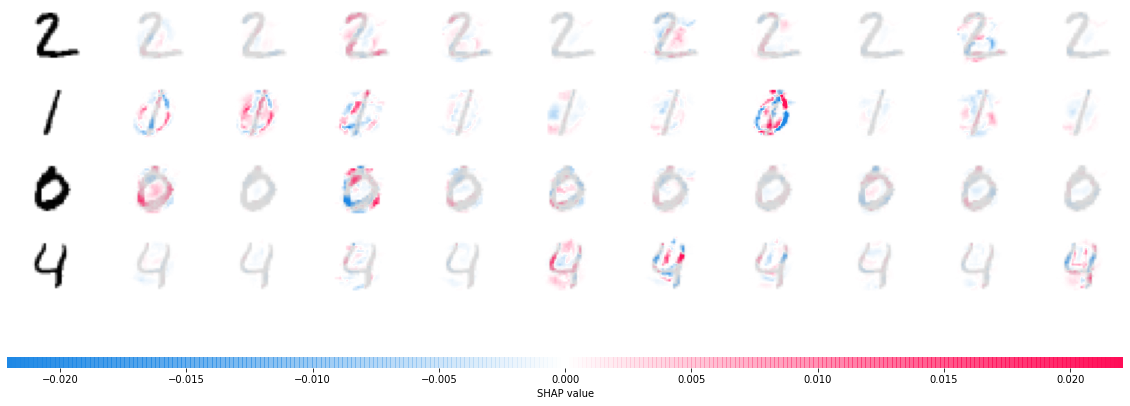

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values_one_record, -record_to_explain)